# Exercise 5

**练习**：

实现一个 **自动大小猜数字游戏（Higher or Lower Game）**。

* 范围：1 \~ 20
* 最多 7 次猜测
* 如果猜对则结束，否则继续循环，直到 7 次用完
* 每次猜测后，提示节点输出“太大了/太小了”，并根据提示调整范围

输入：

```json
{"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20}
```

提示：每次猜测后需要根据提示调整边界。

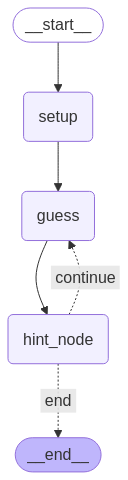

In [31]:
from typing import List,Dict,TypedDict
from langgraph.graph import StateGraph,START,END
import random

In [32]:
class AgentState(TypedDict):
    player_name:str
    guesses:List[int]
    attempts:int
    lower_bound:int
    upper_bound:int
    hint:str
    target_number:int

In [33]:
def setup_node(state:AgentState) -> AgentState:
    """使用随机目标数字初始化游戏"""
    state["player_name"] = f"你好，{state['player_name']}！"
    state["guesses"] = []
    state["attempts"]=0
    state["lower_bound"]=state["lower_bound"]
    state["upper_bound"]=state["upper_bound"]
    state["hint"] = "游戏开始了！试着猜一下数字。"
    state["target_number"] = random.randint(state["lower_bound"], state["upper_bound"])
    return state

def guess_node(state:AgentState) -> AgentState:
    """根据之前的提示生成更明智的猜测"""
    state["guesses"].append(random.randint(state["lower_bound"], state["upper_bound"]))
    state["attempts"]+=1

    return state

def should_continue(state:AgentState) -> str:
    if state["attempts"] < 7 and not state["hint"].startswith("恭喜"):
        return "loop"
    else:
        return "exit"

def hint_node(state:AgentState) -> AgentState:
    target = state["target_number"]
    latest_guess = state["guesses"][-1]

    if latest_guess > target:
        state["hint"] = "太大了"
        state["upper_bound"]=latest_guess-1
    elif latest_guess < target:
        state["hint"] = "太小了"
        state["lower_bound"]=latest_guess+1
    else:
        state["hint"] = f"恭喜你猜对了！正确答案是{target}!你一共猜了{state['attempts']}次：{state['guesses']}"

    return state

In [34]:
graph = StateGraph(AgentState)

graph.add_node("setup_node",setup_node)
graph.add_node("guess_node",guess_node)
graph.add_node("hint_node",hint_node)

graph.add_edge(START,"setup_node")
graph.add_edge("setup_node","guess_node")
graph.add_edge("guess_node","hint_node")
graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "loop":"guess_node",
        "exit":END,
    }
)

app = graph.compile()

In [35]:
answer = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

In [36]:
print("游戏结果:")
print(f"玩家: {answer['player_name']}")
print(f"目标数字: {answer['target_number']}")
print(f"尝试次数: {answer['attempts']}")
print(f"猜测历史: {answer['guesses']}")
print(f"最终提示: {answer['hint']}")
print(f"最终边界: [{answer['lower_bound']}, {answer['upper_bound']}]")

# 显示完整答案
answer

游戏结果:
玩家: 你好，Student！
目标数字: 2
尝试次数: 4
猜测历史: [12, 10, 1, 2]
最终提示: 恭喜你猜对了！正确答案是2!你一共猜了4次：[12, 10, 1, 2]
最终边界: [2, 9]


{'player_name': '你好，Student！',
 'guesses': [12, 10, 1, 2],
 'attempts': 4,
 'lower_bound': 2,
 'upper_bound': 9,
 'hint': '恭喜你猜对了！正确答案是2!你一共猜了4次：[12, 10, 1, 2]',
 'target_number': 2}